<a href="https://colab.research.google.com/github/valec3/DataScienceProjects/blob/main/MODELOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cargar Librerias**

In [2]:
# @title

# Manejo de datos
import json
import numpy as np
import pandas as pd
import ast
from pandas.io.json import json_normalize
# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


### **Cargar Datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/EDA Y PREPROCESAMIENTO/Traffic_Modelo.csv')
df.head()

,channelGrouping,visitNumber,operatingSystem,browser,deviceCategory,isMobile,metro,city,campaign,referralPath,...,year,month,quarterMonth,day,weekday,time_range,conversion_rate,session_duration,visit_frequency,user_interaction
0,4,1,9,5,0,False,0,250,0,197,...,2016,9,3,2,4,1,0.0,NaN,1,0
1,4,1,6,5,0,False,52,295,0,197,...,2016,9,3,2,4,4,0.0,31321.0,1,0
2,1,1,6,5,0,False,0,43,4,197,...,2016,9,3,2,4,3,0.0,20874.0,1,0
3,4,2,11,18,1,True,52,295,0,197,...,2016,9,3,2,4,0,0.0,22847.0,3,0
4,4,1,11,18,1,True,52,295,0,197,...,2016,9,3,2,4,4,0.0,-49978.0,3,1


## **Preprocesamiento de datos**

In [25]:
def get_info_df(df):
    df_info = pd.DataFrame({'Nombre_Columna': df.columns,
                            'No_Nulls': df.notnull().sum().values,
                            'Tipo_Dato': df.dtypes.values},
                           index=range(1, len(df.columns)+1))
    return df_info

In [ ]:
columns_json = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [ ]:
for column in columns_json:
    column_as_df = pd.json_normalize(df[column])
    col_df = pd.json_normalize(df[column].apply(json.loads))
    col_df.columns = [f"{column}.{subcolumn}" for subcolumn in col_df.columns]
    df = df.drop(column, axis=1).merge(col_df, right_index=True, left_index=True)

In [ ]:
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,Not Socially Engaged,1483540608,1,1483540608,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/pl/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,Not Socially Engaged,1483580407,1,1483580407,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,Not Socially Engaged,1483592122,1,1483592122,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,Not Socially Engaged,1483601927,2,1483601927,Chrome,not available in demo dataset,...,not available in demo dataset,True,/yt/about/lt/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Entrenar Modelos**

In [23]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/EDA Y PREPROCESAMIENTO/Traffic_Modelo.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int64  
 1   visitNumber         12283 non-null  int64  
 2   operatingSystem     12283 non-null  int64  
 3   browser             12283 non-null  int64  
 4   deviceCategory      12283 non-null  int64  
 5   isMobile            12283 non-null  bool   
 6   metro               12283 non-null  int64  
 7   city                12283 non-null  int64  
 8   campaign            12283 non-null  int64  
 9   referralPath        12283 non-null  int64  
 10  medium              12283 non-null  int64  
 11  source              12283 non-null  int64  
 12  bounces             12283 non-null  int64  
 13  hits                12283 non-null  int64  
 14  transactionRevenue  12283 non-null  float64
 15  pageviews           12283 non-null  int64  
 16  newV

In [ ]:
df_info = get_info_df(df)
df_info

,Nombre_Columna,No_Nulls,Tipo_Dato
1,channelGrouping,12283,int64
2,visitNumber,12283,int64
3,operatingSystem,12283,int64
4,browser,12283,int64
5,deviceCategory,12283,int64
6,isMobile,12283,bool
7,metro,12283,int64
8,city,12283,int64
9,campaign,12283,int64
10,referralPath,12283,int64


In [4]:
df=df.dropna()

In [5]:
X = df.drop('transactionRevenue', axis=1)
y = df['transactionRevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

models = {
    'LightGBM': lgb.LGBMRegressor(n_estimators=200, learning_rate=0.01'Gradient Boosting': GradientBoostingRegressor(n_estimators=200),
    'Random Forest': RandomForestRegressor(max_depth=10, n_estimators=200),
    'Support Vector Machine': SVR(kernel='rbf',C=10,epsilon=0.5,gamma='auto'),
    'AdaBoost': AdaBoostRegressor(n_estimators=200, learning_rate=0.01),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.01)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({'Modelo': name, 'MSE': mse, 'R^2': r2, 'MAE': mae, 'RMSE': rmse})


results_df = pd.DataFrame(results)
results_df


,Modelo,MSE,R^2,MAE,RMSE
0,LightGBM,297.617278,0.413909,1.637038,17.251588
1,Gradient Boosting,36.543529,0.928036,0.262177,6.045124
2,Random Forest,77.314170,0.847747,0.442575,8.792848
3,Support Vector Machine,509.003941,-0.002370,2.335725,22.561116
4,AdaBoost,100.551823,0.801986,0.808321,10.027553
5,XGBoost,108.585484,0.786165,0.669129,10.420436


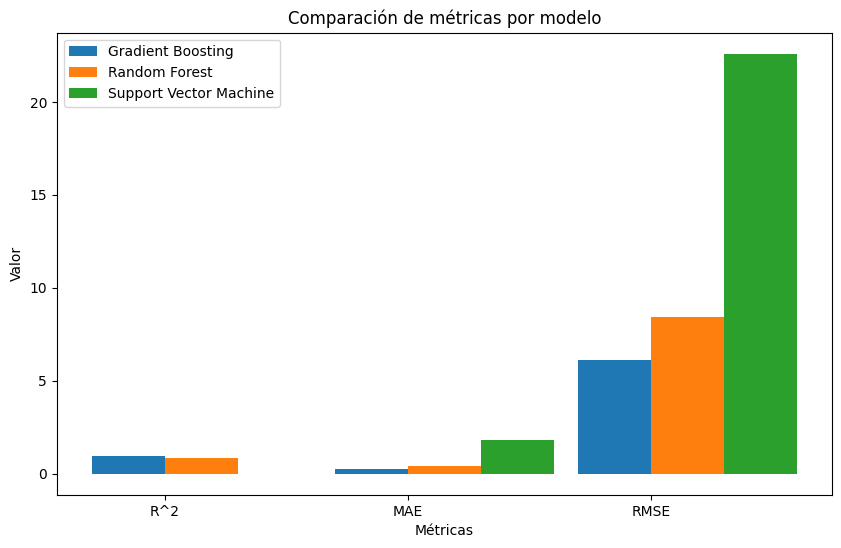

In [ ]:
import matplotlib.pyplot as plt

metricas = [ 'R^2', 'MAE', 'RMSE']
modelos = results_df['Modelo'].unique()

fig, ax = plt.subplots(figsize=(10, 6))
ancho_barra = 0.3
espacio_entre_barras = 0
indice = np.arange(len(metricas))

# Para cada modelo, graficar una barra para cada métrica
for i, modelo in enumerate(modelos):
    valores_metricas = results_df.loc[results_df['Modelo'] == modelo, metricas].values[0]
    ax.bar(indice + (ancho_barra + espacio_entre_barras) * i, valores_metricas, width=ancho_barra, label=modelo)

ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas por modelo')
ax.set_xticks(indice + ancho_barra / 2)
ax.set_xticklabels(metricas)
ax.legend()

plt.show()


### **Optimizar hiperparametros**

#### **SVM**

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse, greater_is_better=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

model = SVR(kernel='rbf')
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_model = SVR(**best_params)
best_model.fit(X_train, y_train)


Mejores hiperparámetros: {'C': 10, 'epsilon': 0.5, 'gamma': 'auto'}


SVR(C=10, epsilon=0.5, gamma='auto')

#### **Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.5]
}

model_gb = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

best_model_gb = GradientBoostingRegressor(**best_params_gb)
best_model_gb.fit(X_train, y_train)


Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


GradientBoostingRegressor(n_estimators=200)

#### **Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

model_rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring=scorer)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Mejores hiperparámetros para Random Forest:", best_params_rf)

best_model_rf = RandomForestRegressor(**best_params_rf)
best_model_rf.fit(X_train, y_train)


Mejores hiperparámetros para Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(max_depth=10, n_estimators=200)

In [ ]:
indices_aleatorios = np.random.choice(len(X_test), size=10, replace=False)
X_test_10 = X_test.iloc[indices_aleatorios]
y_test_10 = y_test.iloc[indices_aleatorios]

y_pred = models['Gradient Boosting'].predict(X_test_10)

df_resultados = pd.DataFrame({
    'Real_Y': y_test_10,
    'Y_Estimado': y_pred
})

print(df_resultados)

       Real_Y  Y_Estimado
6463      0.0   -0.002166
10420     0.0   -0.002166
4639      0.0   -0.002166
3659      0.0   -0.002166
4394      0.0   -0.002166
9216      0.0   -0.002166
4675      0.0   -0.002166
4631      0.0   -0.002166
9916      0.0   -0.002166
9738      0.0   -0.002166


### **Guardar modelo**

In [ ]:
from joblib import dump
modelo = models['Gradient Boosting']
dump(modelo, 'model.joblib')

['model.joblib']

## **TEST**

In [7]:
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_test.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})

In [27]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 1 to 1001
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     1001 non-null   int64  
 1   visitNumber         1001 non-null   int64  
 2   operatingSystem     1001 non-null   int64  
 3   browser             1001 non-null   int64  
 4   deviceCategory      1001 non-null   int64  
 5   isMobile            1001 non-null   bool   
 6   metro               1001 non-null   int64  
 7   city                1001 non-null   int64  
 8   campaign            1001 non-null   int64  
 9   referralPath        1001 non-null   int64  
 10  medium              1001 non-null   int64  
 11  source              1001 non-null   int64  
 12  bounces             1001 non-null   int64  
 13  hits                1001 non-null   int64  
 14  transactionRevenue  1001 non-null   float64
 15  pageviews           1001 non-null   int64  
 16  newVis

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb

In [9]:
# @title Default title text
def convert_dict_to_json_str(value):
    return json.dumps(value)

def reprocesamiento(df_traffic):
    # Define las columnas que están en formato JSON
    diccionario = ['device', 'geoNetwork', 'trafficSource', 'totals']

    # Itera sobre las columnas JSON
    for column in diccionario:
        # Verifica si los datos ya son un diccionario
        if isinstance(df_traffic[column][0], str):
            # Si no, convierte los datos JSON a un diccionario de Python
            df_traffic[column] = df_traffic[column].apply(json.loads)

        # Extrae las claves de todos los elementos del diccionario
        all_keys = set()
        for row in df_traffic[column]:
            if row is not None:
                all_keys.update(row.keys())

        # Para cada clave, crea una nueva columna en el DataFrame
        for key in all_keys:
            df_traffic[key] = df_traffic[column].apply(lambda x: x.get(key, None))

        # Elimina la columna original en formato JSON
        df_traffic.drop(column, axis=1, inplace=True)


    # Reemplazar textos por números
    cuant = ['bounces', 'hits','newVisits','pageviews', 'transactionRevenue']
    for columna in cuant:
       df_traffic[columna] = pd.to_numeric(df_traffic[columna], errors='coerce').fillna(0)

    # Convertir la columna 'bounces' a tipo int64
    df_traffic['bounces'] = df_traffic['bounces'].astype('int64')

    # Convertir la columna 'transactionRevenue' a tipo float
    df_traffic['transactionRevenue'] = df_traffic['transactionRevenue'].astype('float64')

    # Convertir la columna 'newVisits' a tipo float
    df_traffic['newVisits'] = df_traffic['newVisits'].astype('int64')

    # Dividir transactionRevenue por 1000000
    if 'transactionRevenue' in df_traffic.columns:
    # Verificar si los valores son números antes de la división
     df_traffic['transactionRevenue'] = df_traffic['transactionRevenue'].apply(lambda x: x / 1000000 if pd.notnull(x) and isinstance(x, (int, float)) else x)
     #Reemplaza valores nulos con ceros.
     df_traffic['transactionRevenue'].fillna(0, inplace=True)

    # Reemplazar números por fechas
    df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
    df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')

    #Conservar solo las columnas mencionadas
    columnas_conservar = [
        'channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'referralPath', 'city', 'metro', 'visitNumber', 'visitStartTime',
        'browser', 'operatingSystem', 'isMobile', 'deviceCategory',
       'campaign', 'source', 'medium', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue'
         ]

    # Eliminar las columnas que no están en la lista de conservación
    columnas_a_eliminar = [col for col in df_traffic.columns if col not in columnas_conservar]
    df_traffic = df_traffic.drop(columns=columnas_a_eliminar)

    # Eliminar duplicados y columnas que tienen el mismo número o cadena de texto en todas sus filas
    for col in df_traffic.columns:
     if df_traffic[columna].nunique() == 1:
        df_traffic.drop(columna, axis=1, inplace=True)

    return df_traffic

df_traffic = reprocesamiento(df_traffic)
df_traffic.sample(5)

def feature_engineering():
  global df_traffic

  # Crear nuevas variables a partir de 'date'
  df_traffic['year'] = df_traffic['date'].apply(lambda x: x.year)
  df_traffic['month'] = df_traffic['date'].apply(lambda x: x.month)
  df_traffic['quarterMonth'] = df_traffic['date'].apply(lambda x: (x.month - 1) // 3 + 1)
  df_traffic['day'] = df_traffic['date'].apply(lambda x: x.day)
  df_traffic['weekday'] = df_traffic['date'].apply(lambda x: x.weekday())

  # Crear variable 'time_range' a partir de 'visitStartTime'
  df_traffic['time_range'] = pd.cut(df_traffic['visitStartTime'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['madrugada', 'mañana', 'tarde', 'noche'], ordered=False).astype('object')

  # Ratio de Conversiones (Conversion Rate)
  df_traffic['conversion_rate'] = df_traffic['transactionRevenue'] / df_traffic['visitNumber']

  # Duración de la Sesión (Session Duration)
  df_traffic['session_duration'] = df_traffic['visitStartTime'].diff().dt.total_seconds()

  # Frecuencia de Visitas (Visit Frequency)
  visit_frequency = df_traffic.groupby('fullVisitorId')['visitNumber'].nunique()
  df_traffic['visit_frequency'] = df_traffic['fullVisitorId'].map(visit_frequency)


  # Interacción del Usuario (User Interaction)
  df_traffic['user_interaction'] = (df_traffic['bounces'] == 0).astype(int)

  # Eliminar atributos que no se utilizarán
  df_traffic.drop(['date', 'fullVisitorId', 'sessionId', 'visitId', 'visitStartTime'], axis=1, inplace=True)

  # Aplicar LabelEncoder a variables categóricas
  cualitativas = df_traffic.dtypes[df_traffic.dtypes == object].keys()
  for columna in cualitativas:
      lbl = LabelEncoder()
      strings = list(df_traffic[columna].values.astype('str'))
      lbl.fit(strings)
      df_traffic[columna] = lbl.transform(strings)

  # Reiniciar el índice
  df_traffic.reset_index(drop=True, inplace=True)


feature_engineering()

df_traffic.sample(5)


,channelGrouping,visitNumber,operatingSystem,deviceCategory,isMobile,browser,city,metro,campaign,medium,...,year,month,quarterMonth,day,weekday,time_range,conversion_rate,session_duration,visit_frequency,user_interaction
803,1,2,5,0,False,3,92,22,0,0,...,2017,4,2,9,6,0,0.0,50748.0,1,0
259,3,1,4,0,False,3,92,22,0,4,...,2017,6,2,25,6,4,0.0,-379698.0,1,0
538,3,1,6,0,False,3,8,0,0,4,...,2017,5,2,12,4,0,0.0,28107.0,1,1
546,3,1,5,0,False,6,92,22,0,4,...,2017,1,1,7,5,4,0.0,-14824.0,1,1
399,6,1,5,0,False,12,32,0,0,5,...,2016,9,3,18,6,0,0.0,57292.0,1,1


In [10]:
df_traffic = df_traffic[df.columns]
df_traffic = df_traffic.dropna()
X = df_traffic.drop('transactionRevenue',axis=1)

# X['clasificacion'] = modelo_clasificacion.predict(X)
y = df_traffic.transactionRevenue.copy()
modelo = models['Gradient Boosting']
predictions = modelo.predict(X)
predictions[predictions < 1] = 0

#Genera algunas métricas de evaluación de los pronosticos
r2 = r2_score(y, predictions)*100
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"R-cuadrado (R²): {r2}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

R-cuadrado (R²): 99.9539834258455
Error cuadrático medio (MSE): 0.17896001165863049
Raíz del error cuadrático medio (RMSE): 0.4230366552187062


In [30]:
#Ejemplos de los pronósticos
df_resultados = pd.DataFrame({
    'transactionRevenue': y,
    'predictions': predictions
})
df_resultados[df_resultados.transactionRevenue>0].sample(10)

,transactionRevenue,predictions
832,19.19,19.255836
238,27.19,25.548604
939,489.20,485.107832
276,66.96,70.539936
656,192.87,190.759117
654,89.99,84.562093
166,62.05,63.264028
220,7.99,9.046279
487,31.49,30.403190
192,269.55,265.938759
